<a href="https://colab.research.google.com/github/ShadyGirgis79/Needleman-Wunch-Algorithm/blob/main/Needleman_Wunch_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Needleman_Wunsch(seq1, seq2, match, mismatch, GAP):

    # Initialize the score matrix
    n = len(seq1)
    m = len(seq2)

    # Initialize the Needleman Wunsch matrix
    NeedWunMatrix = np.zeros((m+1, n+1))

    # Initialize the traceback matrix
    TracebackMatrix = np.zeros((m+1, n+1)).astype(str)


    # Initialize the first row and column of the score matrix
    for i in range(1, n+1):
        NeedWunMatrix[0][i] = GAP * i
        TracebackMatrix[0][i] = 'L'

    for j in range(1, m+1):
        NeedWunMatrix[j][0] = GAP * j
        TracebackMatrix[j][0] = 'U'

    # Fill in the score matrix and traceback matrix
    for i in range(1, m+1):
        for j in range(1, n+1):
            Diagonal = NeedWunMatrix[i-1][j-1] + (match if seq1[j-1] == seq2[i-1] else mismatch)
            Up = NeedWunMatrix[i-1][j] + GAP
            Left = NeedWunMatrix[i][j-1] + GAP
            NeedWunMatrix[i][j] = max(Diagonal,Up,Left)

            if Diagonal == max(Diagonal,Up,Left):
                TracebackMatrix[i][j] = 'D' #This is for Diagonal traceback
            elif Up == max(Diagonal,Up,Left):
                TracebackMatrix[i][j] = 'U' #This is for Up traceback
            elif Left == max(Diagonal,Up,Left):
                TracebackMatrix[i][j] = 'L' #This is for Left traceback


    #Trace back through the traceback matrix to find the alignment
    align1 = ""
    align2 = ""
    i, j = m, n
    while i > 0 or j > 0:
        if TracebackMatrix[i][j] == "D":
            align1 = seq1[j-1] + align1
            align2 = seq2[i-1] + align2
            i -= 1
            j -= 1
        elif TracebackMatrix[i][j] == "L":
            align1 = seq1[j-1] + align1
            align2 = '-' + align2
            j -= 1
        else:
            align1 = '-' + align1
            align2 = seq2[i-1] + align2
            i -= 1


    return NeedWunMatrix, align1, align2 , TracebackMatrix


In [ ]:
def plot_alignment(NeedWunMatrix, align1, align2):
    plt.imshow(NeedWunMatrix, cmap='Blues', origin='upper')

    plt.xticks(np.arange(len(align1)), list(align1))
    plt.yticks(np.arange(len(align2)), list(align2))

    for i in range(NeedWunMatrix.shape[0]):
        for j in range(NeedWunMatrix.shape[1]):
            plt.text(j, i, str(int(NeedWunMatrix[i][j])), ha='center', va='center', color='black')


    plt.xlabel('Sequence 1')
    plt.ylabel('Sequence 2')
    plt.title('Needleman-Wunsch Alignment')
    plt.colorbar()

    plt.show()

#User Input Data

In [ ]:
seq1 = input("Enter first DNA sequence = ")
seq2 = input("Enter second DNA sequence = ")

Match = int(input("Value of the Match = "))
Mismatch = int(input("Value of the Mismatch = "))
GP = int(input("Value of the Gap = "))

NeedWunMatrix, align1, align2 , TM= Needleman_Wunsch(seq1, seq2 , Match , Mismatch , GP)
plot_alignment(NeedWunMatrix , align1 , align2)
print("Sequence 1:", align1)
print("Sequence 2:", align2)

#Ready Data for Testing

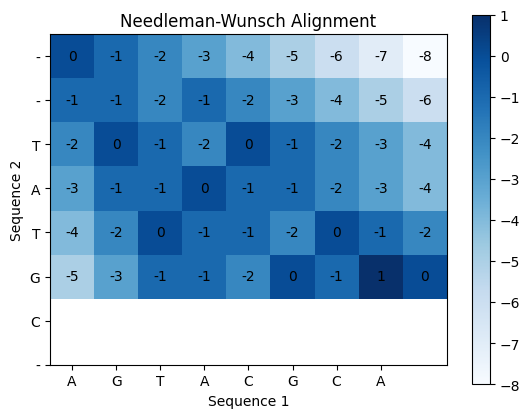

Sequence 1: AGTACGCA
Sequence 2: --TATGC-


In [ ]:
seq1 = "AGTACGCA"
seq2 = "TATGC"

Match = 1
Mismatch = -1
GP = -1

NeedWunMatrix, align1, align2 , TM= Needleman_Wunsch(seq1, seq2 , Match , Mismatch , GP)
plot_alignment(NeedWunMatrix , align1 , align2)
print("Sequence 1:", align1)
print("Sequence 2:", align2)

In [ ]:
col = [0]
for i in range(len(seq1)):
  col.append(seq1[i])

ind = [0]
for i in range(len(seq2)):
  ind.append(seq2[i])

In [ ]:
import pandas as pd
NMW = pd.DataFrame(NeedWunMatrix,columns=col,index=ind)
NMW

,0,A,G,T,A,C,G,C,A
0,0.0,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8.0
T,-1.0,-1.0,-2.0,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0
A,-2.0,0.0,-1.0,-2.0,0.0,-1.0,-2.0,-3.0,-4.0
T,-3.0,-1.0,-1.0,0.0,-1.0,-1.0,-2.0,-3.0,-4.0
G,-4.0,-2.0,0.0,-1.0,-1.0,-2.0,0.0,-1.0,-2.0
C,-5.0,-3.0,-1.0,-1.0,-2.0,0.0,-1.0,1.0,0.0


In [ ]:
TM = pd.DataFrame(TM,columns=col,index=ind)
TM

,0,A,G,T,A,C,G,C,A
0,0.0,L,L,L,L,L,L,L,L
T,U,D,D,D,L,L,L,L,L
A,U,D,L,U,D,L,L,L,D
T,U,U,D,D,U,D,D,D,D
G,U,U,D,U,D,D,D,L,L
C,U,U,U,D,D,D,U,D,L
